### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [7]:
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


3. Decide what to do about your missing data -- drop, replace, other...

In [10]:
# If respondent has no values for all 5 coupon categories, their responses will be dropped
# Otherwise, if there exist values for any of the 5 coupon categories, NaN values will be replaced with never

cols_to_check = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data_cleaned = data.dropna(subset=cols_to_check, how='all')
data_cleaned[cols_to_check] = data_cleaned[cols_to_check].fillna("never")

data_cleaned.isnull().sum()

<ipython-input-10-ff9c13fbefc4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[cols_to_check] = data_cleaned[cols_to_check].fillna("never")


,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


4. What proportion of the total observations chose to accept the coupon?



In [12]:
data_cleaned["Y"].value_counts(normalize=True) * 100

,proportion
Y,
1,56.802721
0,43.197279


5. Use a bar plot to visualize the `coupon` column.

<ipython-input-13-551e3706e9af>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coupon_counts.index, y=coupon_counts.values, palette="pastel")


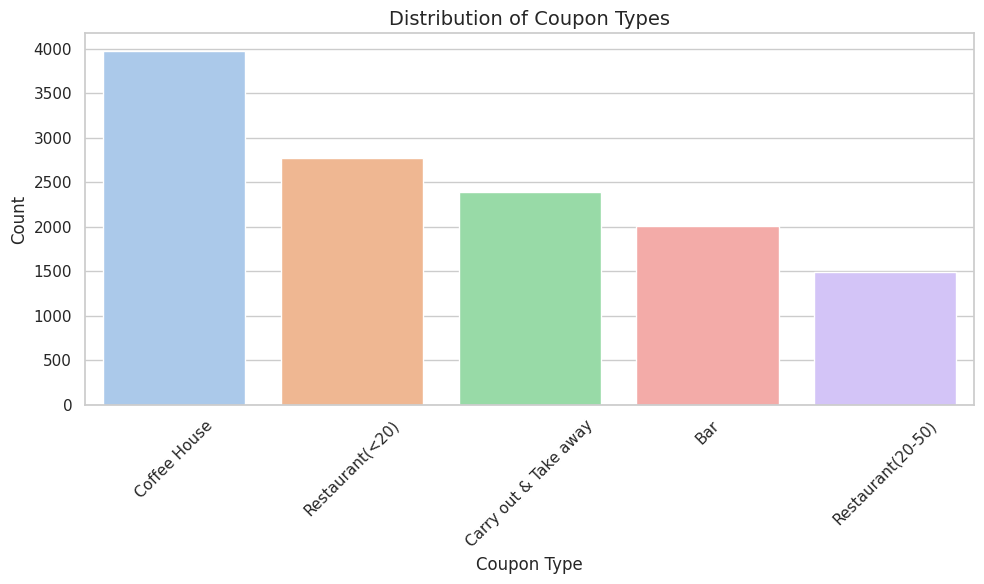

In [13]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
coupon_counts = data_cleaned['coupon'].value_counts()
sns.barplot(x=coupon_counts.index, y=coupon_counts.values, palette="pastel")

# Add labels and title
plt.title("Distribution of Coupon Types", fontsize=14)
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

6. Use a histogram to visualize the temperature column.

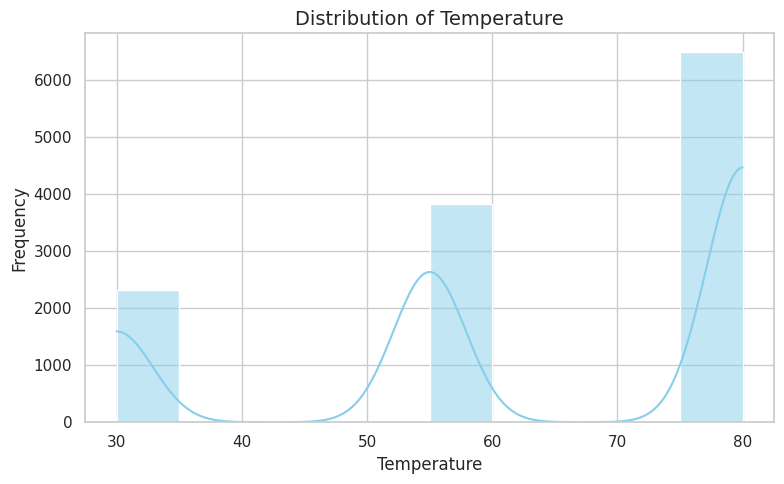

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['temperature'], bins=10, kde=True, color='skyblue')

plt.title("Distribution of Temperature", fontsize=14)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()

plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
bar_coupons = data_cleaned[data_cleaned["coupon"] == "Bar"]

2. What proportion of bar coupons were accepted?


In [16]:
bar_coupons["Y"].value_counts(normalize=True) * 100

,proportion
Y,
0,59.063745
1,40.936255


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [19]:
low_freq = bar_coupons[bar_coupons["Bar"].isin(["never", "less1", "1~3"])]
high_freq = bar_coupons[bar_coupons["Bar"].isin(["4~8", "gt8"])]

low_freq_rate = low_freq["Y"].mean() * 100
high_freq_rate = high_freq["Y"].mean() * 100

print(f"Low bar-goers acceptance rate: {low_freq_rate:.2f}%")
print(f"High bar-goers acceptance rate: {high_freq_rate:.2f}%")

Low bar-goers acceptance rate: 36.98%
High bar-goers acceptance rate: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [22]:
# Group A: Goes to Bars > once a month and are > 25
# Note that group A is excluding those who answered 1-3, since it is otherwise not possible to differentiate between those that go once a month, and those that go more than once a month but less than 3 times a month
# Thus, we will be using those who went 4 or more times a month for the purposes of distribution for the rest of the exercise

group_a = bar_coupons[
    bar_coupons["Bar"].isin(["4~8", "gt8"]) &
    (bar_coupons["age"].isin(["26-30", "31-35", "36-40", "41-45", "46-50", "50plus"]))
]

# Group B: Everyone else

group_b = bar_coupons.drop(group_a.index)

group_a_acceptance = group_a["Y"].mean() * 100
group_b_acceptance = group_b["Y"].mean() * 100

print(f"Group A (frequent bar-goers >25) acceptance rate: {group_a_acceptance:.2f}%")
print(f"Group B (everyone else) acceptance rate: {group_b_acceptance:.2f}%")

Group A (frequent bar-goers >25) acceptance rate: 73.33%
Group B (everyone else) acceptance rate: 40.69%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [28]:
# Group A: Goes to Bars > once a month, had passengers that were not a kid, and have jobs not in farming/fishing/forestry

group_a = bar_coupons[
    bar_coupons["Bar"].isin(["4~8", "gt8"]) &
    (bar_coupons["passanger"] != "Kid(s)") &
    (bar_coupons["occupation"] != "Farming Fishing Forestry")
]

# Group B: Everyone else

group_b = bar_coupons.drop(group_a.index)

group_a_acceptance = group_a["Y"].mean() * 100
group_b_acceptance = group_b["Y"].mean() * 100

print(f"Group A (bar > once/month, no kids, non-farming jobs) acceptance rate: {group_a_acceptance:.2f}%")
print(f"Group B (everyone else) acceptance rate: {group_b_acceptance:.2f}%")


Group A (bar > once/month, no kids, non-farming jobs) acceptance rate: 77.49%
Group B (everyone else) acceptance rate: 37.09%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [32]:
# Defining 3 groups

group1 = bar_coupons[
    bar_coupons["Bar"].isin(["4~8", "gt8"]) &
    (bar_coupons["passanger"] != "Kid(s)") &
    (bar_coupons["maritalStatus"] != "Widowed")
]


group2 = bar_coupons[
    bar_coupons["Bar"].isin(["4~8", "gt8"]) &
    bar_coupons["age"].isin(["below21", "21", "26-30"])
]

group3 = bar_coupons[
    bar_coupons["RestaurantLessThan20"].isin(["4~8", "gt8"]) &
    bar_coupons["income"].isin([
        "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"
    ])
]

group1_acceptance = group1["Y"].mean() * 100
group2_acceptance = group2["Y"].mean() * 100
group3_acceptance = group3["Y"].mean() * 100

print(f"Group 1 (Bar >1/mo, no kids, not widowed): {group1_acceptance:.2f}%")
print(f"Group 2 (Bar >1/mo, age <30): {group2_acceptance:.2f}%")
print(f"Group 3 (Cheap restaurants >4/mo, income <50K): {group3_acceptance:.2f}%")

Group 1 (Bar >1/mo, no kids, not widowed): 77.49%
Group 2 (Bar >1/mo, age <30): 76.19%
Group 3 (Cheap restaurants >4/mo, income <50K): 45.76%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# Adults are more likely to use coupons on a bar when they have passengers that are not childrens
# If your income is less than 50k and you go to cheap restaurants more than 4 times a month, you are less inclined to use a coupon at a bar, which is likely influenced by going to the bar less

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [33]:
# Coupon acceptance by income

income_order = [
    "Less than $12500",
    "$12500 - $24999",
    "$25000 - $37499",
    "$37500 - $49999",
    "$50000 - $62499",
    "$62500 - $74999",
    "$75000 - $87499",
    "$87500 - $99999",
    "$100000 or More"
]

data_cleaned["income"] = pd.Categorical(data_cleaned["income"], categories=income_order, ordered=True)

income_acceptance = data_cleaned.groupby("income")["Y"].mean() * 100
income_acceptance = income_acceptance.sort_index()

print("Coupon Acceptance Rate by Income (sorted by actual income level):\n")
print(income_acceptance)

Coupon Acceptance Rate by Income (sorted by actual income level):

income
Less than $12500    59.266409
$12500 - $24999     57.454943
$25000 - $37499     59.242651
$37500 - $49999     56.364647
$50000 - $62499     59.467635
$62500 - $74999     52.738095
$75000 - $87499     48.308051
$87500 - $99999     53.001133
$100000 or More     57.834101
Name: Y, dtype: float64


<ipython-input-33-1e97497001ca>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["income"] = pd.Categorical(data_cleaned["income"], categories=income_order, ordered=True)
<ipython-input-33-1e97497001ca>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_acceptance = data_cleaned.groupby("income")["Y"].mean() * 100


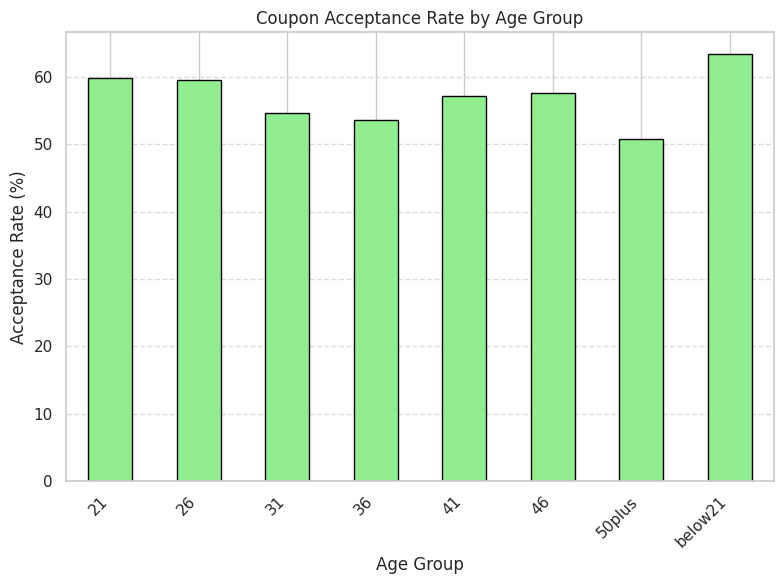

In [34]:
# Coupon acceptance by age

age_acceptance = data_cleaned.groupby("age")["Y"].mean() * 100
age_acceptance = age_acceptance.sort_index()

# Plotting
plt.figure(figsize=(8, 6))
age_acceptance.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Coupon Acceptance Rate by Age Group")
plt.ylabel("Acceptance Rate (%)")
plt.xlabel("Age Group")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')